# Plot chains

This notebook shows how to use GetDist to plot MCMC chains

In [17]:
# Imports
import sys  
sys.path.insert(0, '/Users/Pablo/Projets/COVID/')
from SIR_model import *
from getdist.mcsamples import loadMCSamples
import getdist.plots as gdplt
from matplotlib import pyplot as plt
%matplotlib inline 

Load the samples

In [2]:
gdsamples = loadMCSamples('../chains/test')

../chains/test.1.txt
Removed no burn in


Generate the plot

((0.1547225466158246, 0.17716007338417541),
 (0.03188448639180172, 0.043590373608198285))

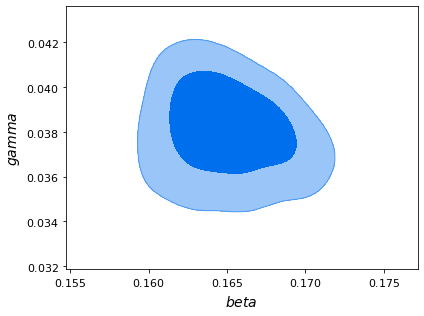

In [3]:
p = gdplt.get_single_plotter(width_inch=6)
p.plot_2d(gdsamples, ["beta", "gamma"], filled=True)
p.export('../plot/saved_plot')

In [9]:
bestfit = gdsamples.getParamBestFitDict(best_sample=True)
beta_bf = bestfit['beta']
gamma_bf = bestfit['gamma']

In [15]:
I_data, i_firstcase = read_data('../data/time_series_covid19_confirmed_global.csv')
I_data = I_data[i_firstcase:]

# Total population, N.
N = 66.65*1e6 # Approximate population of the UK
# Number of days.
ndays = len(I_data)
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = I_data[0], 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0

_, I_theory, _= integrate_SIR(S0, I0, R0, ndays, beta_bf, gamma_bf)

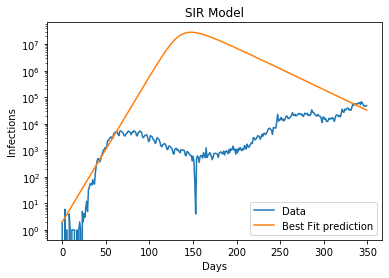

In [20]:
fig = plt.figure()
plt.plot(I_data, label = 'Data')
plt.plot(I_theory, label = 'Best Fit prediction')
plt.xlabel('Days')
plt.ylabel('Infections')
plt.title('SIR Model')
plt.yscale('log')
plt.legend()

In [4]:
import pandas
import numpy as np
def read_data(path, country = 'United Kingdom'):
    ''' Read the data file
    '''

    df = pandas.read_csv(path)

    # Extract specific country. The -1 keeps only the whole country, 
    # as opposed to just a region. The 4: keeps eliminates the entries
    # that are not part of the time series
    data = df[df['Country/Region'] == country].iloc[-1][4:]

    # Convert into a numpy array
    data = data.to_numpy()

    # Find when first case occurs
    i_firstcase = np.where(data>0)[0][0]
    data = data[i_firstcase:]

    return data

# Read the data
I_data = read_data('../data/time_series_covid19_confirmed_global.csv')
R_data = read_data('../data/time_series_covid19_recovered_global.csv')

In [5]:
import matplotlib.pyplot as plt

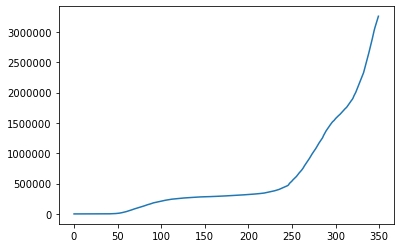

In [6]:
plt.plot(I_data)

In [20]:
R_data

array([1, 1, 1, 1, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 18, 18, 18, 18, 18, 18, 18, 18, 18, 20, 52, 65, 65, 65, 65,
       65, 65, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135,
       135, 135, 135, 135, 135, 344, 344, 344, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,